In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

harris_p1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_p2 = pd.read_csv('data/Option 1/HarrisPartII.csv')
harris_p3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')
vandenberg = pd.read_csv('data/Option 1/vandenBerg_table2.csv')
krause = pd.read_csv('data/Option 1/Krause21.csv')

### CSV File Information
#### Harris Part I (Identifications and Positional Data)
- 1 ['ID'] Cluster identification number
- 2 ['Name'] Other commonly used cluster name
- 3,4 ['RA'], ['DEC'] Right ascension and declination (epoch J2000)
- 5,6 ['L'], ['B'] Galactic longitude and latitude (degrees)
- 7 ['R_sun'] Distance from Sun (kiloparsecs)
- 8 ['R_gc'] Distance from Galactic center (kpc), assuming R_0=8.0 kpc
- 9-11 ['X'], ['Y'], ['Z'] Galactic distance components X,Y,Z in kiloparsecs, in a Sun-centered coordinate system; X points toward Galactic center, Y in direction of Galactic rotation, Z toward North Galactic Pole

#### Harris Part II (Metallicity and Photometry)

1. ['ID'] - Cluster identification  
2. ['Fe_H'] - Metallicity [Fe/H]  
3. ['wt'] - Weight of mean metallicity; essentially the number of independent [Fe/H] measurements averaged together  
4. ['E_BV'] - Foreground reddening (E(B-V))  
5. ['V_HB'] - V magnitude level of the horizontal branch (or RR Lyraes)  
6. ['m_MV'] - Apparent visual distance modulus (m-M)V  
7. ['V_t'] - Integrated V magnitude of the cluster  
8. ['M_V_t'] - Absolute visual magnitude (cluster luminosity), M_V,t = V_t - (m-M)V  
9. ['U_B'] - Integrated color index U-B (uncorrected for reddening)  
10. ['B_V'] - Integrated color index B-V (uncorrected for reddening)  
11. ['V_R'] - Integrated color index V-R (uncorrected for reddening)  
12. ['V_I'] - Integrated color index V-I (uncorrected for reddening)  
13. ['spt'] - Spectral type of the integrated cluster light  
14. ['ellip'] - Projected ellipticity of isophotes, e = 1-(b/a)  


#### Harris Part III (Velocities and Structural Parameters)

1. ['ID'] - Cluster identification  
2. ['v_r'] - Heliocentric radial velocity (km/s)  
3. ['v_r_e'] - Observational (internal) uncertainty in radial velocity  
4. ['v_LSR'] - Radial velocity relative to Solar neighborhood LSR  
5. ['sig_v'] - Central velocity dispersion sig_v (km/s)  
6. ['sig_v_e'] - Observational (internal) uncertainty in velocity dispersion  
7. ['c'] - King-model central concentration, c = log(r_t/r_c); a 'c' denotes a core-collapsed cluster  
8. ['r_c'] - Core radius in arcmin  
9. ['r_h'] - Half-light radius in arcmin  
10. ['mu_V'] - Central surface brightness, V magnitudes per square arcsecond  
11. ['rho_0'] - Central luminosity density, log_10(Solar luminosities per cubic parsec)  
12. ['lg_tc'] - Core relaxation time t(r_c), in log_10(years)  
13. ['lg_th'] - Median relaxation time t(r_h), in log_10(years) 

#### Vandenburg

1. ['#NGC'] - NGC cluster identification number  
2. ['Name'] - Other commonly used cluster name  
3. ['FeH'] - Metallicity [Fe/H]  
4. ['Age'] - Age of the cluster  
5. ['Age_err'] - Age uncertainty  
6. ['Method'] - Method used for determining age  
7. ['Figs'] - Figures referenced in the study  
8. ['Range'] - Range of the measurements  
9. ['HBtype'] - Horizontal branch type  
10. ['R_G'] - Distance from Galactic center (kpc)  
11. ['M_V'] - Absolute visual magnitude  
12. ['v_e0'] - Central escape velocity  
13. ['log_sigma_0'] - Central logarithmic velocity dispersion  


<p style=
    "display: flex;
    flex-direction: column; 
    align-items: center;
    text-align: center;"
>
    <img src="images/vandenberg_variables.png" alt="vandenberg_variables" width="600px"/>
    <em>
        <br/>
        Vandenberg variables as shown in https://arxiv.org/pdf/1308.2257
    </em>
</p>

#### Krause

1. ['Class'] - Classification or category of the object  
2. ['Object'] - Object name or identification number  
3. ['AltName'] - Alternative name or designation for the object  
4. ['Mstar'] - Stellar mass (Mstar) of the object  
5. ['rh'] - Half-light radius (rh) of the object  
6. ['C5'] - Compactness parameter (C5) of the object  
7. ['Age'] - Age of the object in billions of years  
8. ['FeH'] - Metallicity of the object, typically measured as [Fe/H]  

## Tangential Velocity vs. Metallicity

0    1636-283    in-situ   
1    BH_261      in-situ   
2    Djor_2      in-situ   
3    HP_1        in-situ   
4    IC_1276     in-situ   
Name: ID, dtype: object 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Class, dtype: float64
            ID    Name           RA          DEC       L      B  R_Sun  R_gc  \
0      NGC 104  47 Tuc  00:24:05.67  -72:04:52.6  305.89 -44.89    4.5   7.4   
1      NGC 288     NaN  00:52:45.24  -26:34:57.4  152.30 -89.38    8.9  12.0   
2      NGC 362     NaN  01:03:14.26  -70:50:55.6  301.53 -46.25    8.6   9.4   
3    Whiting 1     NaN     02:02:57    -03:15:10  161.22 -60.76   30.1  34.5   
4     NGC 1261     NaN  03:12:16.21  -55:12:58.4  270.54 -52.12   16.3  18.1   
..         ...     ...          ...          ...     ...    ...    ...   ...   
131   NGC 7089     M 2  21:33:27.02  -00:49:23.7   53.37 -35.77   11.5  10.4   
132   NGC 7099    M 30  21:40:22.12  -23:10:47.5   27.18 -46.84    8.1   7.1   
133     Pal 12     NaN  21:46:38.84  -21:15:09.4

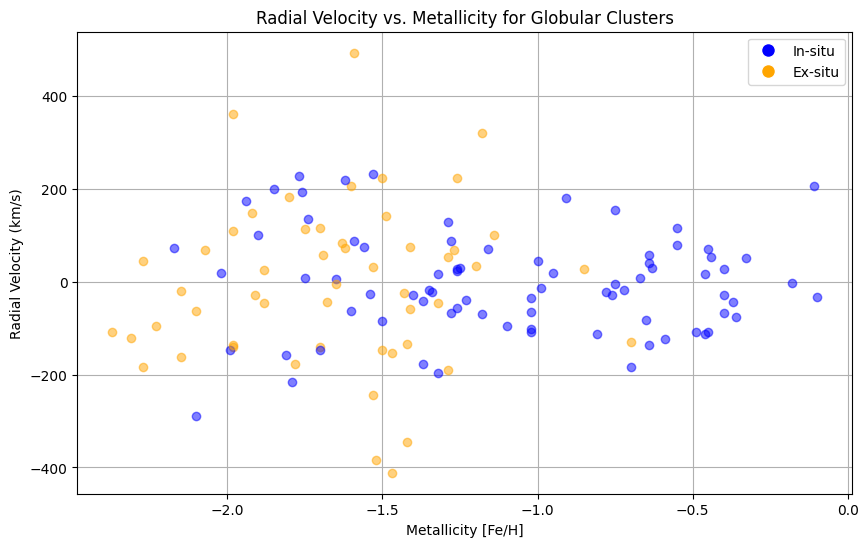

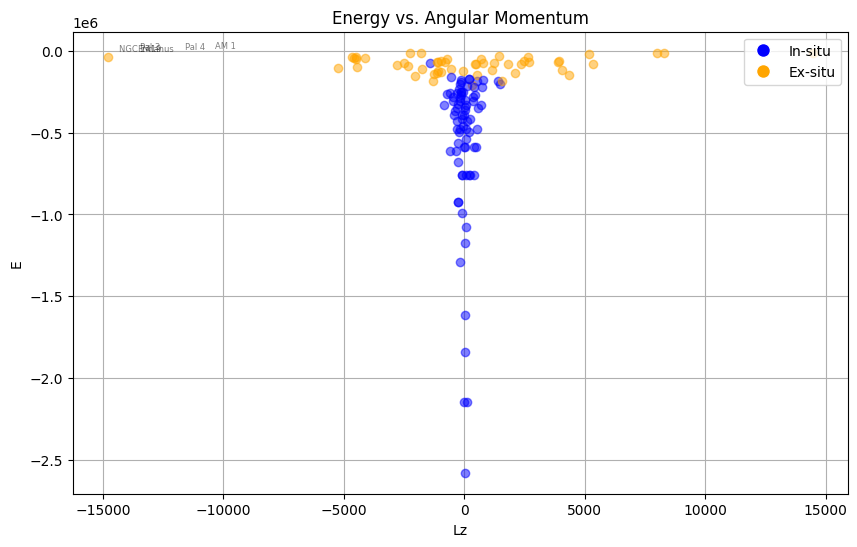

In [138]:
from matplotlib.lines import Line2D

def calculate_orbital_properties(harris_p1, harris_p3):
    """
    Compute total energy E and z-component of angular momentum Lz for each globular cluster.

    Args:
    - harris_p1: DataFrame containing positional data and distance components.
    - harris_p3: DataFrame containing velocity data.

    Returns:
    - clusters_df: DataFrame with calculated E and Lz properties for each cluster.
    """
    # Merge the positional and velocity data based on cluster ID
    clusters_df = pd.merge(harris_p1, harris_p3, on='ID')

    # Constants (assuming certain values for the Galaxy)
    G = 4.30091e-6  # Gravitational constant in kpc (km/s)^2 / Msun
    M_gal = 6e11    # Approximate mass of the Milky Way in solar masses

    # Calculate galactocentric radius and velocities in spherical coordinates
    # clusters_df['R_gc'] = np.sqrt(clusters_df['X']**2 + clusters_df['Y']**2 + clusters_df['Z']**2)
    # clusters_df['v_r'] = clusters_df['v_r']  # Replace with tangential velocity calculation if available

    # Calculate total energy (approximate)
    # clusters_df['E'] = -G * M_gal / clusters_df['R_gc'] + 0.5 * clusters_df['v_r']**2
    clusters_df['E'] = -G * M_gal / (2 * clusters_df['R_gc']) 

    # Calculate z-component of angular momentum
    clusters_df['Lz'] = clusters_df['R_gc'] * clusters_df['v_r']  # Simplified formula for Lz, assumes mass cancels out from E=GmM/2r later

    return clusters_df

def plot_radial_velocity_vs_metallicity(clusters_df):
    """
    Plot radial velocity vs. metallicity for globular clusters.

    Args:
    - clusters_df: DataFrame with cluster information including metallicities and tangential velocities.
    """
    metallicities = clusters_df['[Fe/H]']
    v_r = clusters_df['v_r'].astype(float)
    classification = clusters_df['chen_class']

    plt.figure(figsize=(10, 6))
    
    for i in range(len(metallicities)):
        if classification[i] == 1:
            plt.plot(
            metallicities[i],
            v_r[i],
            'o',
            alpha=0.5,
            label='in-situ',
            color='blue'
            )
        else:
            plt.plot(
            metallicities[i],
            v_r[i],
            'o',
            alpha=0.5,
            label='ex-situ',
            color='orange'
            )
            

    plt.title("Radial Velocity vs. Metallicity for Globular Clusters")
    plt.xlabel("Metallicity [Fe/H]")
    plt.ylabel("Radial Velocity (km/s)")
    plt.grid(True)
    
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='In-situ', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Ex-situ', markerfacecolor='orange', markersize=10),
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.show()
    
def plot_lz_E(clusters_df):
    """
    Plot radial velocity vs. metallicity for globular clusters.

    Args:
    - clusters_df: DataFrame with cluster information including metallicities and tangential velocities.
    """
    Lz = clusters_df['Lz']
    E = clusters_df['E']
    classification = clusters_df['chen_class']
    ids = clusters_df['ID']

    plt.figure(figsize=(10, 6))
    # plt.scatter(metallicities, v_r, color='purple', alpha=0.7)
    
    for i in range(len(E)):
        if classification[i] == 1:
            plt.plot(
            Lz[i],
            E[i],
            'o',
            alpha=0.5,
            label='in-situ',
            color='blue',
            # markersize=20
            )
        else:
            plt.plot(
            Lz[i],
            E[i],
            'o',
            alpha=0.5,
            label='ex-situ',
            color='orange'
            )
        plt.annotate(ids[i], (E[i], Lz[i]), fontsize=6, alpha=0.5)
    
    plt.title("Energy vs. Angular Momentum")
    plt.xlabel("Lz")
    plt.ylabel("E")
    plt.grid(True)
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='In-situ', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Ex-situ', markerfacecolor='orange', markersize=10),
    ]
    
    plt.legend(handles=legend_elements, loc='upper right')
    
    # plt.xlim(-1e7, 1e4)
    
    plt.show()

# def classify_clusters_by_ELz(clusters_df):
#     """
#     Classify globular clusters as in-situ or accreted based on E-Lz boundary.

#     Args:
#     - clusters_df: DataFrame containing computed E and Lz values.

#     Returns:
#     - clusters_df: Updated DataFrame with a new column 'Classification' indicating in-situ or accreted.
#     """
#     # Define E-Lz boundaries based on the https://arxiv.org/pdf/2309.15902 methodology
#     def is_in_situ(E, Lz):
#         if Lz < -0.58:
#             return E < -1.3
#         elif -0.58 <= Lz <= 0.58:
#             return E < (-1.4 + 0.3 * Lz**2)
#         else:
#             return E < (-1.325 + 0.075 * Lz**2)

#     clusters_df['Classification'] = clusters_df.apply(lambda row: 'in-situ' if is_in_situ(row['E'], row['Lz']) else 'accreted', axis=1)
    
#     return clusters_df


clusters_df = calculate_orbital_properties(harris_p1, harris_p3)

# Join with metallicities
harris_p2['[Fe/H]'] = pd.to_numeric(harris_p2['[Fe/H]'], errors='coerce')
clusters_df['[Fe/H]'] = harris_p2['[Fe/H]']
# print(clusters_df.columns)

# classify_clusters_by_ELz(clusters_df)


# Merge with classifications from Chen
# https://websites.umich.edu/~ognedin/mw_gc_classification.txt
chen = pd.read_csv('data/Option 1/chen_classification.csv')
print(chen['ID'][0:5], chen['Class'][0:5])

ids, clss = [], []
for r in chen['ID']:
    id, cls = r.split()
    id = id.replace('_', ' ')
    ids.append(id)
    clss.append(1 if cls == 'in-situ' else 0)

chen2 = pd.DataFrame()
chen2['ID'] = ids
chen2['chen_class'] = clss

clusters_df = clusters_df.merge(chen2, on='ID')
print(clusters_df)


# Plotting
plot_radial_velocity_vs_metallicity(clusters_df)
plot_lz_E(clusters_df)


## Velocity Dispersion vs Radial Velocity

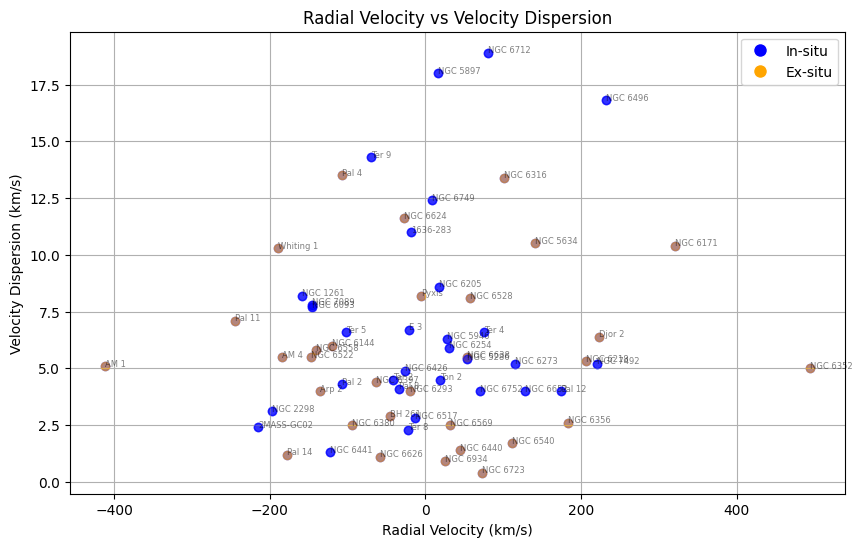

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Harris Part I and III data
harris_part1 = pd.read_csv('data/Option 1/HarrisPartI.csv')
harris_part3 = pd.read_csv('data/Option 1/HarrisPartIII.csv')

# Merge the relevant data based on the 'ID' column (Cluster identification)
merged_data = pd.merge(harris_part1, harris_part3, on="ID").merge(chen2, on='ID')

# Use radial velocity (v_r) from Part III
v_r = merged_data['v_r']

# Velocity dispersion
sig_v = merged_data['sig_v']

classification = clusters_df['chen_class']

# Remove any rows with missing or NaN values for velocity dispersion
valid_data = merged_data[~merged_data['sig_v'].isna()]

# Plotting Radial Action (v_r) vs Tangential Velocity (using sig_v as a proxy)
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['v_r'], valid_data['sig_v'], c='b', label='Globular Clusters', alpha=0.6)

for i in range(len(v_r)):
    if classification[i] == 1:
        plt.plot(
        v_r[i],
        sig_v[i],
        'o',
        alpha=0.5,
        label='in-situ',
        color='blue',
        # markersize=20
        )
    else:
        plt.plot(
        v_r[i],
        sig_v[i],
        'o',
        alpha=0.5,
        label='ex-situ',
        color='orange'
        )
    plt.annotate(ids[i], (v_r[i], sig_v[i]), fontsize=6, alpha=0.5)

plt.title('Radial Velocity vs Velocity Dispersion')
plt.xlabel('Radial Velocity (km/s)')
plt.ylabel('Velocity Dispersion (km/s)')
plt.grid(True)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='In-situ', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Ex-situ', markerfacecolor='orange', markersize=10),
]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()
